In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Dataset.csv']


In [2]:
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
data = pd.read_csv('../input/Dataset.csv')

# View first and last 5 observations
print(data.head())
print(data.tail())

   having_IP_Address  URL_Length   ...    Statistical_report  Result
0                 -1           1   ...                    -1      -1
1                  1           1   ...                     1      -1
2                  1           0   ...                    -1      -1
3                  1           0   ...                     1      -1
4                  1           0   ...                     1       1

[5 rows x 31 columns]
       having_IP_Address  URL_Length   ...    Statistical_report  Result
11050                  1          -1   ...                     1       1
11051                 -1           1   ...                     1      -1
11052                  1          -1   ...                     1      -1
11053                 -1          -1   ...                     1      -1
11054                 -1          -1   ...                    -1      -1

[5 rows x 31 columns]


In [3]:
# Describe statistical information of data
print(data.describe())
# Below stats show that 75 percentile of obseravtions belong to class 1 

       having_IP_Address      ...             Result
count       11055.000000      ...       11055.000000
mean            0.313795      ...           0.113885
std             0.949534      ...           0.993539
min            -1.000000      ...          -1.000000
25%            -1.000000      ...          -1.000000
50%             1.000000      ...           1.000000
75%             1.000000      ...           1.000000
max             1.000000      ...           1.000000

[8 rows x 31 columns]


In [4]:
# Check column types
print(data.info())               

# All comumns are int type, so no change is required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null int64
URL_Length                     11055 non-null int64
Shortining_Service             11055 non-null int64
having_At_Symbol               11055 non-null int64
double_slash_redirecting       11055 non-null int64
Prefix_Suffix                  11055 non-null int64
having_Sub_Domain              11055 non-null int64
SSLfinal_State                 11055 non-null int64
Domain_registeration_length    11055 non-null int64
Favicon                        11055 non-null int64
port                           11055 non-null int64
HTTPS_token                    11055 non-null int64
Request_URL                    11055 non-null int64
URL_of_Anchor                  11055 non-null int64
Links_in_tags                  11055 non-null int64
SFH                            11055 non-null int64
Submitting_to_email            11055 non-null int64
Abnorma

In [5]:
# See target values
np.unique(data.Result)

# Update values of -1 with 0
data['Result'] = [0 if x == -1 else 1 for x in data.Result]

np.unique(data.Result)  # Done

array([0, 1])

(array([4898.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6157.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

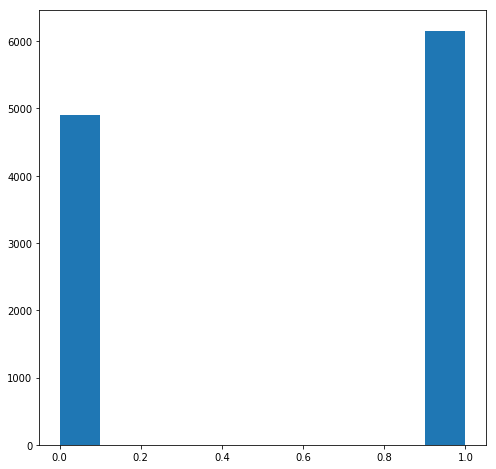

In [6]:
# Plot distribution of classes using Histograms
plt.figure(figsize =(8,8))
plt.hist(data.Result)           

# It shows that benign class have about 1000+ observations than malware

In [7]:
# Look for missing values
print(data.isnull().sum())        

# No missing values found, so no need to drop or replace any value

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

                             having_IP_Address    ...       Result
having_IP_Address                     1.000000    ...     0.094160
URL_Length                           -0.052411    ...     0.057430
Shortining_Service                    0.403461    ...    -0.067966
having_At_Symbol                      0.158699    ...     0.052948
double_slash_redirecting              0.397389    ...    -0.038608
Prefix_Suffix                        -0.005257    ...     0.348606
having_Sub_Domain                    -0.080745    ...     0.298323
SSLfinal_State                        0.071414    ...     0.714741
Domain_registeration_length          -0.022739    ...    -0.225789
Favicon                               0.087025    ...    -0.000280
port                                  0.060979    ...     0.036419
HTTPS_token                           0.363534    ...    -0.039854
Request_URL                           0.029773    ...     0.253372
URL_of_Anchor                         0.099847    ...     0.69

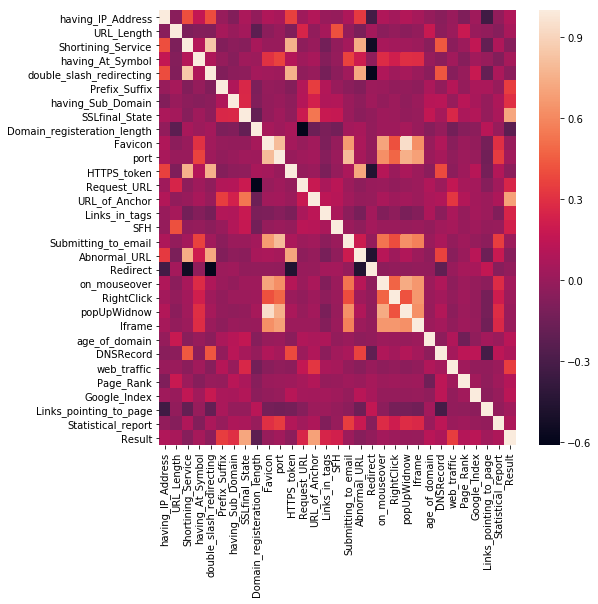

In [8]:
# Generate correlation matrix
print(data.corr())

import seaborn as sns
plt.figure(figsize =(8,8))
sns.heatmap(data.corr())    # Generate heatmap (though very less clarity due to large no. of ftrs

In [9]:
print(data.corr()['Result'].sort_values())      # Print correlation with target variable

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.052948
URL_Length                     0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IP_Address              0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229
Request_URL                    0.253372


In [10]:
# Remove features having correlation coeff. between +/- 0.03
data.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(data.columns))

25


In [11]:
# Prepare data for models
y = data['Result'].values
X = data.drop(['Result'], axis = 1)

from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Split the data as training and testing data - 70% train size, 30% test size
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = None)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy with RF classifier: 0.967741935483871
Conf matrix RF classifier: [[1401   61]
 [  46 1809]]
Accuracy with Log Reg: 0.9255351220982816
Conf matrix Log Reg: [[1336  126]
 [ 121 1734]]
Accuracy with SVM-Linear: 0.9237262586674706
Conf matrix SVM-linear: [[1320  142]
 [ 111 1744]]


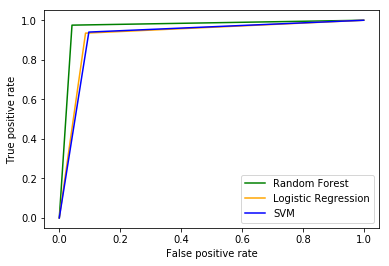

Accuracy by RFClassifier after RFE is applied: 0.9716611395839614
Accuracy by SVM-Linear after RFE is applied: 0.9237262586674706
Accuracy by Logistic Regression after RFE is applied: 0.9255351220982816


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
#1 Classification using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)
print("Accuracy with RF classifier:",accuracy_score(y_test, prediction)) 
fpr,tpr,thresh = roc_curve(y_test,prediction)      
roc_auc = accuracy_score(y_test,prediction)         # Calculate ROC AUC

# Plot ROC curve for Random Forest
plt.plot(fpr,tpr,'g',label = 'Random Forest')
plt.legend("Random Forest", loc='lower right')
plt.legend(loc='lower right')
print("Conf matrix RF classifier:",confusion_matrix(y_test,prediction))  #  Generate confusion matrix

#2 Classification using logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
print("Accuracy with Log Reg:", accuracy_score(y_test, prediction))
print ("Conf matrix Log Reg:",confusion_matrix(y_test,prediction))
fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)

# Plot ROC curve for Logistic Regression
plt.plot(fpr,tpr,'orange',label = 'Logistic Regression')
plt.legend("Logistic Regression", loc='lower right')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')

#3 Classification using SVM
from sklearn.svm import SVC
svc_l = SVC(kernel = "linear", C = 0.025)
svc_l = svc_l.fit(X_train,y_train)
prediction = svc_l.predict(X_test)
print("Accuracy with SVM-Linear:",accuracy_score(y_test, prediction))
fpr,tpr,thresh = roc_curve(y_test,prediction)
roc_auc = accuracy_score(y_test,prediction)

# Plot ROC curve for SVM-linear
plt.plot(fpr,tpr,'b',label = 'SVM')
plt.legend("SVM", loc ='lower right')
plt.legend(loc ='lower right')
print("Conf matrix SVM-linear:",confusion_matrix(y_test,prediction))

plt.show()

'''
# -------- Apply Recursive Feature Elimination(RFE) and use reduced feature set for prediction ------------------------
# Recursive Feature Elimination(RFE) is a technique that takes entire feature set as input and removes features one at 
# a time up to a specified number or until a stopping criteria is met.
'''
from sklearn.feature_selection import RFE
rfe = RFE(rfc,27)                              
rfe = rfe.fit(X_train, y_train)               # Train RF classifier with only 27 features now
pred = rfe.predict(X_test)

# Test accuracy on reduced data
print("Accuracy by RFClassifier after RFE is applied:", accuracy_score(y_test,pred))

rfe = RFE(svc_l,27)
rfe = rfe.fit(X_train, y_train)               # Train SVM with only 27 features now
pred = rfe.predict(X_test)
print("Accuracy by SVM-Linear after RFE is applied:", accuracy_score(y_test,pred))

rfe = RFE(logreg,27)
rfe = rfe.fit(X_train, y_train)              # Train Logistic-Reg with only 27 features now
pred = rfe.predict(X_test)
print("Accuracy by Logistic Regression after RFE is applied:", accuracy_score(y_test,pred))